# Import Important Libraries

# SIMPLE LINEAR REGRESSION

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
#Importing The data

Df =  r'C:\Users\Windows 10 Pro\Downloads\FuelConsumption.csv'
Df = pd.read_csv(Df)
Df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [39]:
Df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
#Choosing Some columns
df = Df[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


Histo plot For each Feature

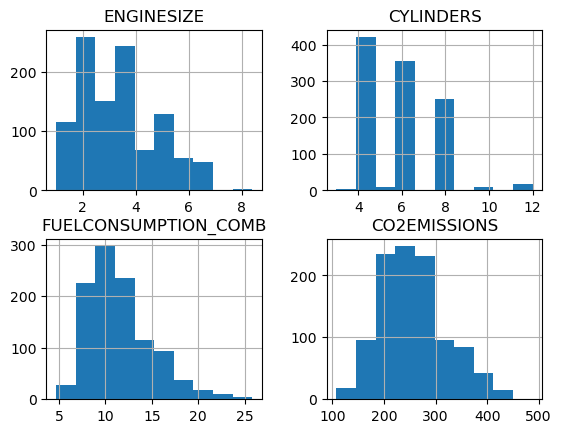

In [6]:
plot = df[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
plot.hist()
plt.show()


**Plotting to see linearity in their relationship**

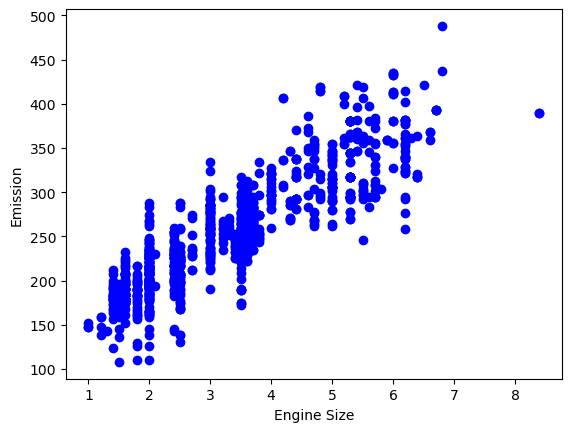

In [8]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

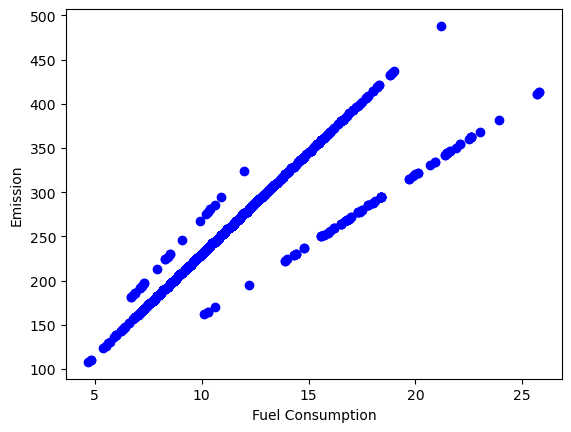

In [9]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS, color='blue')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")
plt.show()

# Train and Test Data

**Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:**

In [10]:
msk = np.random.rand(len(Df)) < 0.8
train = df[msk]
test = df[~msk]

**Train Data Distribution**

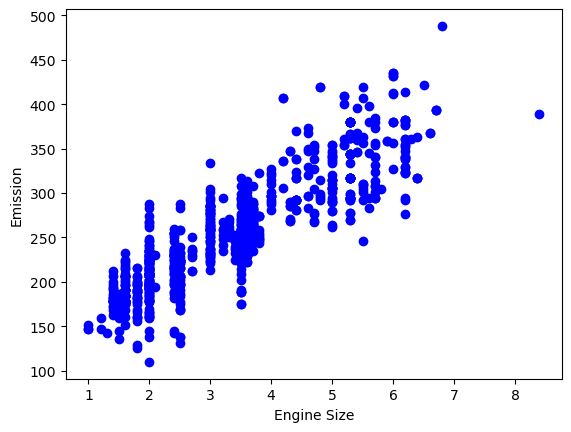

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

**MODELLING**

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.62306197]]
Intercept:  [126.56190463]


**Plotting The Fit line**

Text(0, 0.5, 'Emission')

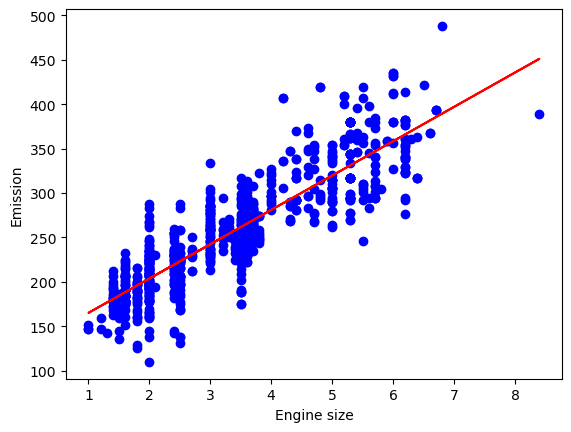

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

**Evaluation Metrix**

In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 24.96
Residual sum of squares (MSE): 1060.91
R2-score: 0.76


# Multiple linear Regression

In [15]:
# lets take our data 

Df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [16]:
# CHOOSING OUR X(INDEPENDENT) AND Y(DEPENDANT) VALUES

y = Df.CO2EMISSIONS
x =Df[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

**Splitting data into Training and Testing**

In [18]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 10)
print("Training: ", train_x.shape, train_y.shape)
print("Testing: ", test_x.shape, test_y.shape)

Training:  (853, 4) (853,)
Testing:  (214, 4) (214,)


**Creating a Regression Model**

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
MODEL = LinearRegression()

# Train or fit the model 
MODEL.fit(train_x, train_y)

LinearRegression()

In [31]:
predictions = MODEL.predict(test_x)
print("Predictions: ", predictions)

Predictions:  [175. 264. 267. 230. 239. 276. 396. 334. 278. 258. 225. 283. 182. 366.
 205. 308. 338. 320. 344. 274. 218. 193. 195. 246. 209. 244. 159. 175.
 198. 196. 209. 242. 166. 207. 224. 232. 294. 216. 306. 294. 258. 320.
 225. 262. 334. 301. 264. 275. 380. 380. 262. 262. 283. 338. 191. 179.
 198. 193. 294. 237. 359. 209. 340. 338. 251. 196. 382. 221. 262. 225.
 209. 216. 317. 253. 368. 230. 338. 228. 207. 228. 196. 166. 294. 331.
 362. 304. 191. 228. 242. 288. 186. 288. 380. 230. 186. 419. 191. 184.
 216. 308. 228. 251. 301. 260. 228. 267. 258. 246. 166. 308. 250. 177.
 202. 225. 264. 327. 232. 237. 239. 258. 294. 283. 260. 292. 264. 212.
 380. 145. 246. 209. 294. 218. 200. 264. 147. 255. 269. 255. 191. 212.
 198. 317. 184. 315. 207. 235. 242. 285. 398. 437. 344. 271. 228. 288.
 196. 413. 186. 221. 186. 244. 251. 380. 184. 310. 338. 343. 172. 126.
 432. 310. 320. 299. 163. 198. 110. 407. 274. 262. 209. 317. 411. 362.
 276. 228. 184. 317. 196. 242. 389. 306. 301. 228. 216. 334. 25

**Evaluating Model Performance**

In [28]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
mae= mean_absolute_error(test_y, predictions)
intercept = MODEL.intercept_

print("R2 score: ", r2)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Intercept: ", intercept)

R2 score:  1.0
Mean Squared Error:  4.907157182384163e-29
Mean Absolute Error:  1.7265524420338883e-15
Intercept:  -2.842170943040401e-14


R2_score is 1 which is the highest score this is a better fit.
mse is very low 4.9 which is good.
mae is low 1.7 which is also very good.
intercept is -2.84 when co2 emission is 0 which is unlikely.

**Plotting Predicted Vs Actual Values**

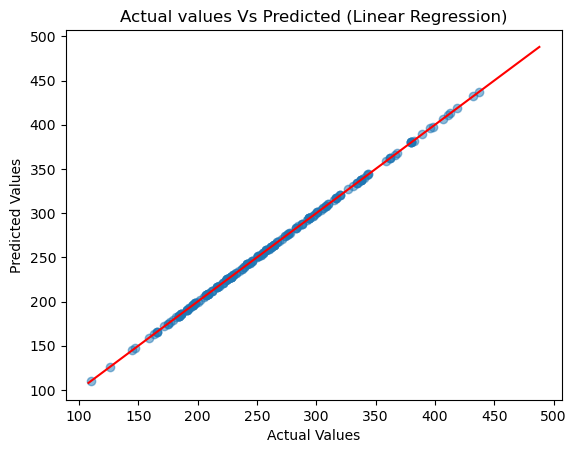

In [34]:
plt.scatter(test_y, predictions, alpha = 0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()], color = "red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual values Vs Predicted (Linear Regression)")
plt.show()

**Residual Plot**

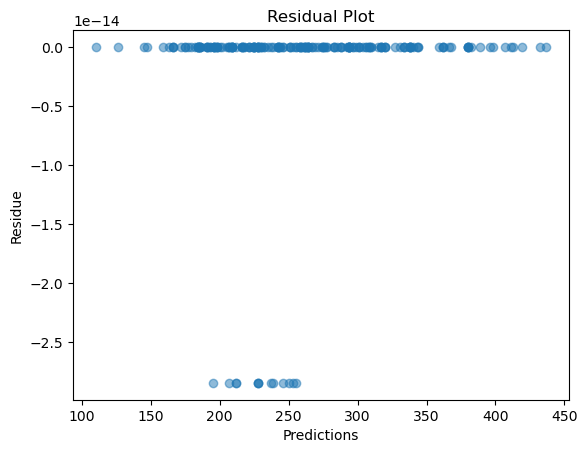

In [36]:
plt.scatter(predictions, test_y-predictions, alpha=0.5 )
plt.xlabel("Predictions")
plt.ylabel("Residue")
plt.title("Residual Plot")
plt.show()